
#Project Introduction: Predicting Google Stock Prices

The stock market is a dynamic and complex system that has captivated investors for centuries. Understanding the factors that drive stock prices is essential for making informed investment decisions. In this project, we will explore the use of machine learning techniques to predict the future prices of Google (GOOG) stocks.

To train and evaluate our prediction models, we will utilize historical stock data from Yahoo Finance. Yahoo Finance is a financial website that provides a comprehensive range of financial data, including stock prices, news, and market analysis. We will access this data using the yfinance library in Python, which provides a convenient interface for retrieving and manipulating financial data from Yahoo Finance.

In [ ]:
pip install yahoofinance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings

#Retrieving Google Stock Data

This code snippet retrieves historical data for Google (GOOG) stock from Yahoo Finance using the yfinance library. The first line creates a `Ticker` object for Google stock using the `yf.Ticker()` function. The second line retrieves historical data for the past five years using the `history()` method. The retrieved data is stored in a Pandas DataFrame object named `df`.

The `5Y` argument passed to the `history()` method indicates that you want to retrieve historical data for the past five years. The retrieved data will include information such as the opening price, closing price, high price, low price, and volume for each trading day within the specified time range.

The `df` DataFrame can be used for further analysis and prediction tasks. For example, you can use the data to visualize historical stock prices, calculate technical indicators, or train machine learning models to predict future stock prices.

In [ ]:
google = yf.Ticker('GOOG')
df = google.history('5Y')
df.head()

#Visualizing Google Stock Closing Prices

This code snippet visualizes the closing prices of Google (GOOG) stock using the Matplotlib library. The first line sets the visual style to 'darkgrid' using the `sns.set_style()` function. This style provides a dark background and grid lines for a clearer presentation.

The second line creates a new figure using the `plt.figure()` function. The figure size is set to (12, 5) using the `figsize` parameter, resulting in a wider and taller plot.

The third line adds a title to the plot using the `plt.title()` function. The title is set to 'Closing prize overview', which clearly indicates the purpose of the plot.

The fourth line plots the closing prices of Google stock using the `plt.plot()` function. The `df.Close` parameter specifies that the closing prices from the df DataFrame should be plotted.

The resulting plot displays a line graph that depicts the historical closing prices of Google stock over time. The dark background and grid lines provided by the 'darkgrid' style enhance the readability of the plot.

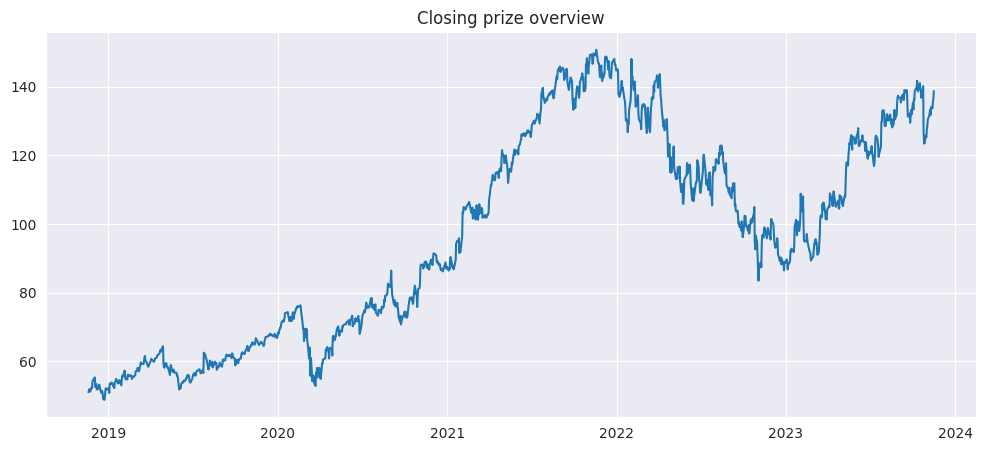

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
plt.title('Closing prize overview')
plt.plot(df.Close)

#Adding Moving Averages to the Data Frame

This code snippet adds two moving averages, a 50-day moving average (50DMA) and a 200-day moving average (200DMA), to the `df` DataFrame. Moving averages are technical indicators that help identify trends and smooth out short-term price fluctuations in stock prices.

The first line calculates the 50DMA by applying `the rolling()` function to the `Close` column with a window size of 50. This means that the average closing price over the past 50 days is calculated for each data point. The result is assigned to a new column named `fiftyDMA`.

The second line calculates the 200DMA in a similar manner, but with a window size of 200. This captures the long-term trend in Google stock prices. The result is assigned to a new column named `200DMA`.

These moving averages provide valuable insights into the underlying price movements of Google stock, potentially aiding in trading decisions.

In [ ]:
df['fiftyDMA'] = df['Close'].rolling(50).mean()

df['200DMA'] = df['Close'].rolling(200).mean()

#Descriptive Statistics of the DataFrame
The provided DataFrame contains information about various stock market statistics, including the open, high, low, and close prices, volume, dividends, stock splits, 50-day moving average (fiftyDMA), and 200-day moving average (200DMA).

The 'describe()' function provides a summary of the statistical properties of each column in the DataFrame. The output includes the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values for each numerical column.

After removing the 'Dividends' and 'Stock Splits' columns, the DataFrame is left with the following columns: Open, High, Low, Close, Volume, fiftyDMA, and 200DMA. These columns provide a comprehensive overview of the stock's price movements and trading activity.

Here's a summary of the key findings from the descriptive statistics:

- The average open price is 96.74, while the average high price is 97.44. This indicates a slight upward trend in the stock's price.

- The average low price is 49.05, and the average closing price is 96.93. This suggests that the stock price tends to close higher than it opens.
The average trading volume is 5.345 billion, indicating significant trading activity in this stock.

- The 50DMA and 200DMA are both around 97.5, suggesting that the stock price has been relatively stable over the past 50 and 200 days.

Overall, the descriptive statistics provide a valuable snapshot of the stock's price movements, trading activity, and overall trends.

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,200DMA
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.000000,1208.000000,1058.000000
mean,96.693186,97.825926,95.680720,96.774848,2.953762e+07,0.0,0.015911,96.923838,97.753292
std,30.331646,30.616734,30.019069,30.306067,1.298221e+07,0.0,0.564108,29.391928,26.588017
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,52.808530,56.602108
25%,67.392998,67.945503,66.802002,67.364998,2.122000e+07,0.0,0.000000,67.892854,70.284017
50%,97.220001,99.300003,95.889999,97.330002,2.641800e+07,0.0,0.000000,97.138400,102.105594
75%,124.199997,125.452003,122.900002,124.142502,3.369400e+07,0.0,0.000000,123.265115,119.288638
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [ ]:
df.drop(columns=['Dividends','Stock Splits'],inplace=True)


Note: There are `NaN` values in the `fiftyDMA` and `200DMA` columns because the moving averages have not been calculated for the first few rows of the DataFrame. This is because the moving average calculation requires a certain number of previous data points in order to be calculated. For example, the 50-day moving average requires 50 previous data points, and the 200-day moving average requires 200 previous data points.

As a result, the fiftyDMA and 200DMA columns will contain NaN values for the first few rows of the DataFrame, until there are enough data points to calculate the moving averages.

In [ ]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,200DMA
Date,,,,,,,
2018-11-19 00:00:00-05:00,52.860001,53.039501,50.813000,51.000000,37172000,NaN,NaN
2018-11-20 00:00:00-05:00,50.000000,51.587002,49.800999,51.287998,48982000,NaN,NaN
2018-11-21 00:00:00-05:00,51.838001,52.428001,51.673500,51.880501,30686000,NaN,NaN
2018-11-23 00:00:00-05:00,51.500000,51.879501,51.119949,51.194000,13830000,NaN,NaN
2018-11-26 00:00:00-05:00,51.917500,52.465500,51.695499,52.431000,38856000,NaN,NaN


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,200DMA
Date,,,,,,,
2023-11-10 00:00:00-05:00,131.529999,134.270004,130.869995,134.059998,20872900,134.6220,119.000825
2023-11-13 00:00:00-05:00,133.360001,134.110001,132.770004,133.639999,16409900,134.5588,119.165475
2023-11-14 00:00:00-05:00,135.649994,137.240005,135.100006,135.429993,22317300,134.5332,119.352875
2023-11-15 00:00:00-05:00,136.639999,136.839996,135.330002,136.380005,15840900,134.5534,119.535425
2023-11-16 00:00:00-05:00,136.960007,138.880005,136.080002,138.699997,17576000,134.6034,119.721775


#Plotting Closing Price, 50 DMA, and 200 DMA
The provided code visualizes the closing price, 50-day moving average (50 DMA), and 200-day moving average (200 DMA) of a stock over time. The code utilizes the `sns.set_style()` function to set a dark grid style for the plot, enhancing readability.

The `plt.figure()` function creates a figure with a specified size of 10 units in width and 5 units in height, providing ample space for the plot. The title of the plot is set to "Closing price vs 50 DMA vs 200 DMA" using the `plt.title()`function, clearly indicating the data being displayed.

The `plt.plot()` function is used to plot three lines representing the closing price, 50 DMA, and 200 DMA. The closing price is plotted using the `df['Close']` series, the 50 DMA is plotted using the `df['fiftyDMA']` series, and the 200 DMA is plotted using the `df['200DMA']` series. Labels are assigned to each line using the label parameter within the `plt.plot()` function.

Finally, the `plt.legend(`) function is used to create a legend that displays the labels for each line, making it clear which line corresponds to which data series.

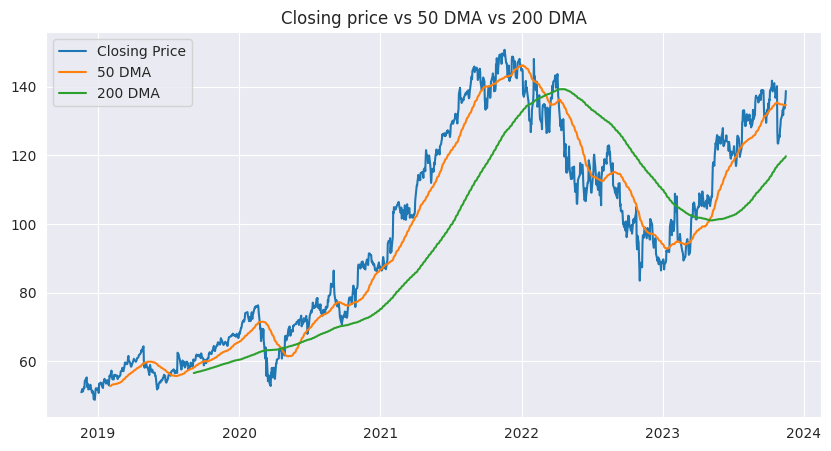

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Closing price vs 50 DMA vs 200 DMA')
plt.plot(df['Close'],label='Closing Price')
plt.plot(df['fiftyDMA'],label='50 DMA')
plt.plot(df['200DMA'],label='200 DMA')
plt.legend()

#Visualizing Correlation Matrix Using Heatmap
The provided code creates a heatmap to visualize the correlation matrix of the DataFrame `df`. The correlation matrix represents the pairwise correlations between all numerical columns in the DataFrame.

The heatmap is generated using the `sns.heatmap()` function, which takes the correlation matrix as input and displays the correlations in a color-coded format. Darker shades of red indicate stronger positive correlations, while darker shades of blue indicate stronger negative correlations.

The `annot` parameter is set to `True`, which causes the correlation coefficients to be displayed within the heatmap cells. This allows for easy identification of the strength and direction of correlations between variables.

The heatmap provides a visual representation of the relationships between the numerical columns in the DataFrame, making it easier to identify patterns and insights that might not be readily apparent from the individual correlation coefficients.

<Axes: >

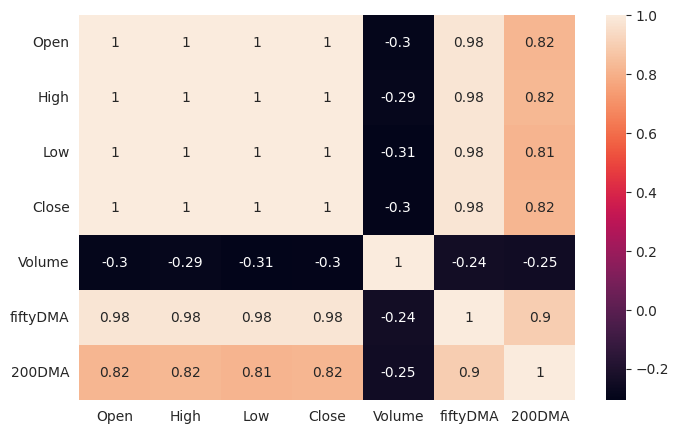

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

<Axes: title={'center': '50 DMA'}, xlabel='fiftyDMA', ylabel='Count'>

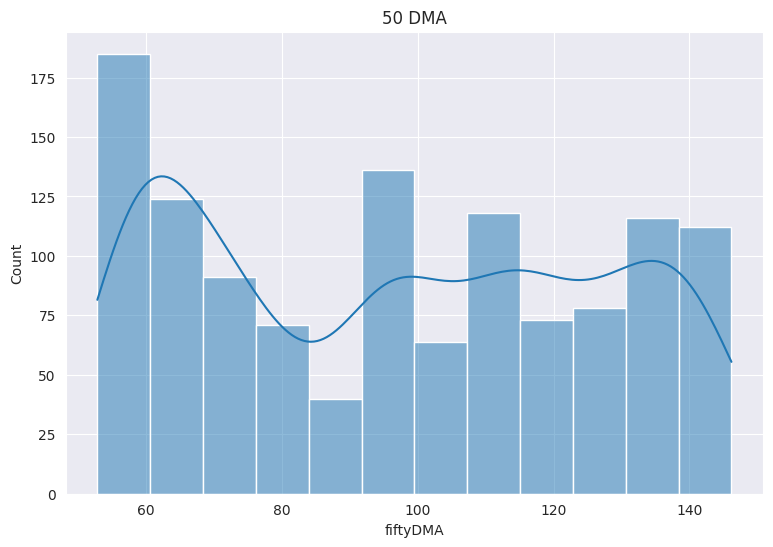

In [ ]:
plt.figure(figsize=(9,6))
plt.title('50 DMA')
sns.histplot(x=df['fiftyDMA'],kde=True)


<Axes: title={'center': 'Closing Price'}, xlabel='Close', ylabel='Count'>

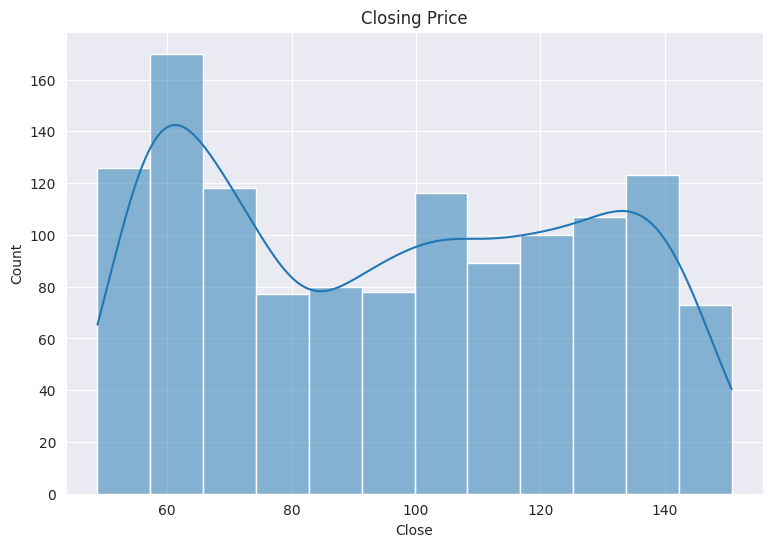

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Closing Price')
sns.histplot(x=df['Close'],kde=True)



#Importing the Formula API from Statsmodels
The provided code imports the formula API from the Statsmodels library into the current Python environment. The formula API is a convenient way to fit statistical models using R-style formulas.

The `import statsmodels.formula.api` as `smf` statement aliases the Statsmodels formula API as smf. This makes it easier to refer to the formula API functions and methods without having to type the full library name each time.

The formula API is a powerful tool for data scientists and statisticians who want to work with R-style formulas in Python. It allows you to specify statistical models concisely and easily, and it provides a number of functions for fitting, evaluating, and visualizing models.

In [ ]:
import statsmodels.formula.api as smf

#Fitting a Linear Regression Model Using the Formula API
The provided code fits a linear regression model using the formula API from the Statsmodels library. The model predicts the `Close` price of a stock based on its `fiftyDMA`.

The model is fitted using the `smf.ols()` function, which takes the formula `Close ~ fiftyDMA` and the DataFrame `df` as input. The formula specifies that the `Close` price is the dependent variable and the `fiftyDMA` is the independent variable.

The model is then summarized using the `model.summary()` method. The summary provides information about the model's fit, including the R-squared, p-values, coefficients, and standard errors.

In [ ]:
model = smf.ols(formula='Close ~ fiftyDMA',data=df)
model = model.fit()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.454e+04
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:46:32   Log-Likelihood:                -3955.6
No. Observations:                1208   AIC:                             7915.
Df Residuals:                    1206   BIC:                             7925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3934      0.635      5.345      0.000       2.148       4.639
fiftyDMA       0.9819      0.006    156.644      0.000       0.970       0.994
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.650
Skew:                          -0.611   Prob(JB):                     6.85e-19
Kurtosis:                       3.411   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

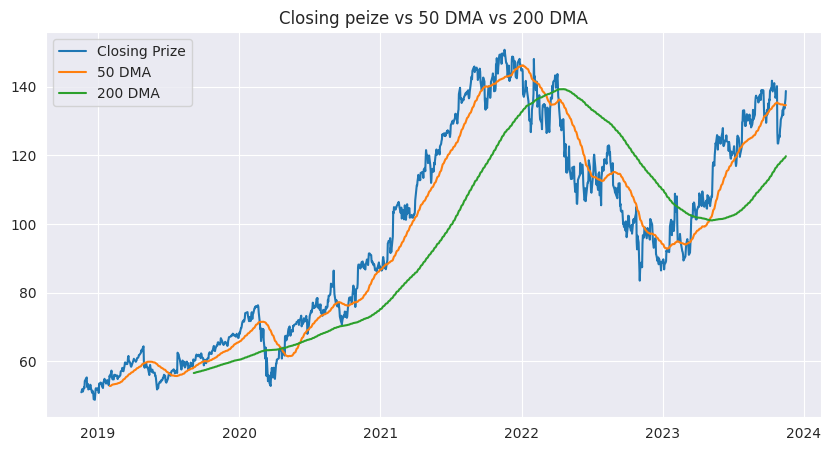

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Closing peize vs 50 DMA vs 200 DMA')
plt.plot(df['Close'],label='Closing Prize')
plt.plot(df['fiftyDMA'],label='50 DMA')
plt.plot(df['200DMA'],label='200 DMA')
plt.legend()

#Predicting Stock Prices Using Fitted Linear Regression Model
The provided code utilizes a fitted linear regression model to predict stock prices based on 50-day moving average (50DMA) values. It utilizes the pandas library to manage and manipulate the input data.

The code first creates a DataFrame named `new_data` containing 50DMA values. This DataFrame serves as the input data for the prediction process.

The `model.predict()` method is then invoked to generate predictions from the fitted linear regression model. The new_data DataFrame is passed as input, and the model produces predictions for the closing price of the stock.

Finally, the predicted closing prices are printed using the `print()` function.

In summary, the code predicts stock prices based on 50DMA values using a fitted linear regression model. It creates input data, generates predictions, and displays the results.

In [ ]:
import pandas as pd

new_data = pd.DataFrame({'fiftyDMA': [105,100,103,110,115]})
predictions = model.predict(new_data)

In [ ]:
print(predictions)

0    106.490292
1    101.580916
2    104.526541
3    111.399667
4    116.309043
dtype: float64


#Visualizing Predicted Closing Prices Based on 50DMA Values

The provided code generates a line plot to visualize the predicted closing prices of a stock based on 50-day moving average (50DMA) values. It utilizes the matplotlib library for creating the plot.

The code first creates two separate line plots using the `plt.plot()` function. The first plot represents the 50DMA values from the `new_data`, and it is labeled as 'new data value'. The second plot represents the predicted closing prices generated from the fitted linear regression model, and it is labeled as 'Predictions of that new data'.

Finally, `the plt.legend()` function is used to create a legend that displays the labels for the two line plots, making it clear which line corresponds to which data series. This visualization allows for easy interpretation of the relationship between the 50DMA values and the predicted closing prices.

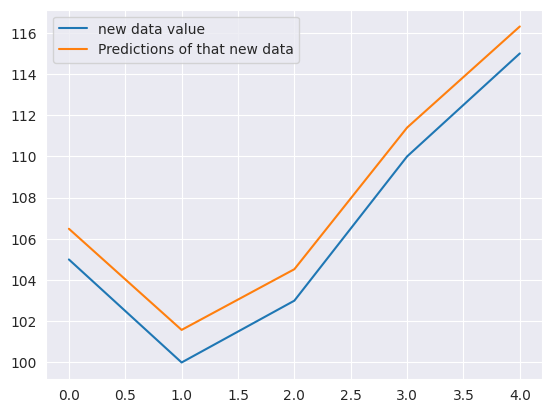

In [ ]:
plt.plot(new_data,label='new data value')
plt.plot(predictions,label = 'Predictions of that new data')
plt.legend()